In [1]:
import sqlite3

# Connect (creates the DB file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Apple", 10, 0.5),
    ("Banana", 5, 0.3),
    ("Apple", 20, 0.5),
    ("Orange", 7, 0.7),
    ("Banana", 8, 0.3),
    ("Orange", 5, 0.7)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)

# Save and close
conn.commit()
conn.close()

print("Database and sample data created successfully.")


Database and sample data created successfully.


In [2]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# SQL to summarize total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Run the query and load results into pandas
df = pd.read_sql_query(query, conn)
conn.close()

# Display results
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         30     15.0
1  Banana         13      3.9
2  Orange         12      8.4


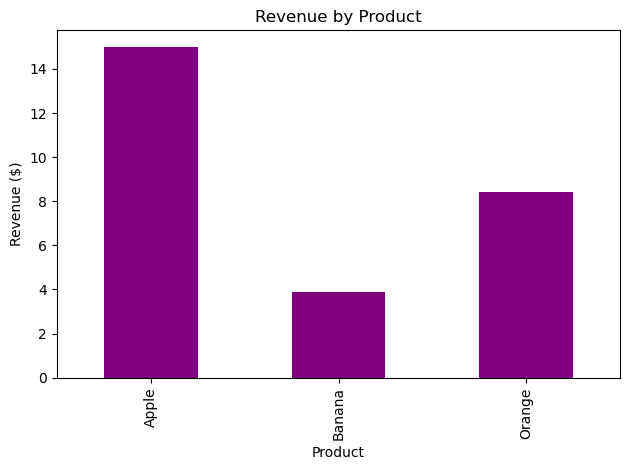

In [5]:
import matplotlib.pyplot as plt

# Bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', legend=False, color='purple')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()
